In [1]:
from google.colab import files
files.upload()  # Upload the kaggle.json file


Saving kaggle_new.json to kaggle_new.json


{'kaggle_new.json': b'{"username":"nsain25","key":"709b2aa17872a52438b47c4eb47cc1b4"}'}

In [2]:
import os

# Rename the file to kaggle.json
os.rename("kaggle_new.json", "kaggle.json")

# Move it to ~/.kaggle/
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verify the file
kaggle_path = "/root/.kaggle/kaggle.json"
if os.path.exists(kaggle_path):
    print("✅ kaggle.json is correctly placed in ~/.kaggle")
else:
    print("⚠️ kaggle.json is still missing! Please check again.")


✅ kaggle.json is correctly placed in ~/.kaggle


In [3]:
import os

# List all files in the current directory
files = os.listdir()

# Print all files to check if 'kaggle_new (1).json' exists
print("📂 Files in the current directory:", files)


📂 Files in the current directory: ['.config', 'sample_data']


In [5]:
import os
import zipfile

# Define the dataset folder
# Assuming your dataset path is '/content/food5k'
dataset_folder = '/content/food5k'  # Replace with the actual path if different

# Extract dataset if it’s zipped
zip_path = os.path.join(dataset_folder, "food5k.zip")  # Adjust if necessary
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall("food_images")
    print("Dataset extracted successfully!")
else:
    print("Dataset is already extracted or not zipped.")

Dataset is already extracted or not zipped.


In [6]:
!pip install kagglehub


In [7]:
!pip install instaloader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.2 MB/s eta 0:00:00


In [8]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import os

def fetch_arxiv_papers(query, max_results=1000):
    base_url = "http://export.arxiv.org/api/query"
    params = {
        "search_query": query,
        "start": 0,
        "max_results": max_results,
        "sortBy": "submittedDate",
        "sortOrder": "descending",
    }
    response = requests.get(base_url, params=params)
    root = ET.fromstring(response.text)

    papers = []
    for entry in root.findall("{http://www.w3.org/2005/Atom}entry"):
        title = entry.find("{http://www.w3.org/2005/Atom}title").text
        summary = entry.find("{http://www.w3.org/2005/Atom}summary").text
        authors = [author.find("{http://www.w3.org/2005/Atom}name").text for author in entry.findall("{http://www.w3.org/2005/Atom}author")]
        url = entry.find("{http://www.w3.org/2005/Atom}id").text
        papers.append({"Title": title, "Abstract": summary, "Authors": ", ".join(authors), "URL": url})

    return pd.DataFrame(papers)

# Create the folder if it doesn't exist
output_folder = "/content/study_material_pdfs"
os.makedirs(output_folder, exist_ok=True)

# Fetch and save the CSV in the correct directory
df = fetch_arxiv_papers("AI OR Machine Learning OR Deep Learning")
csv_path = os.path.join(output_folder, "research_papers.csv")
df.to_csv(csv_path, index=False)

print(f"✅ Research papers saved successfully at: {csv_path}")
print(f"📂 Files in {output_folder}: {os.listdir(output_folder)}")


✅ Research papers saved successfully at: /content/study_material_pdfs/research_papers.csv
📂 Files in /content/study_material_pdfs: ['research_papers.csv']


In [9]:
from bs4 import BeautifulSoup
import requests
import os
import time

def download_arxiv_pdfs(base_url="https://arxiv.org/list/cs/recent", output_folder="/content/study_material_pdfs", max_papers=5000):
    response = requests.get(base_url)

    if response.status_code != 200:
        print(f"❌ Failed to fetch URL: {base_url}")
        return

    soup = BeautifulSoup(response.text, "html.parser")

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Extract paper IDs from the arXiv recent list
    paper_links = [link["href"] for link in soup.find_all("a", href=True) if link["href"].startswith("/abs/")]
    paper_links = list(set(paper_links))[:max_papers]  # Remove duplicates & limit to max_papers

    if not paper_links:
        print("⚠️ No research papers found.")
        return

    downloaded_files = []
    failed_downloads = []

    for i, paper_link in enumerate(paper_links, start=1):
        paper_id = paper_link.split("/abs/")[-1]
        pdf_url = f"https://arxiv.org/pdf/{paper_id}.pdf"
        pdf_path = os.path.join(output_folder, f"{paper_id}.pdf")

        pdf_response = requests.get(pdf_url)
        if pdf_response.status_code == 200:
            with open(pdf_path, "wb") as file:
                file.write(pdf_response.content)
            downloaded_files.append(pdf_path)
            print(f"📥 [{i}/{len(paper_links)}] Downloaded: {pdf_path}")
        else:
            failed_downloads.append(paper_id)
            print(f"⚠️ [{i}/{len(paper_links)}] Failed to download: {pdf_url}")

        time.sleep(0.5)  # Reduce request load

    print("\n📊 Download Summary:")
    print(f"✅ Successfully downloaded: {len(downloaded_files)} PDFs")
    print(f"❌ Failed downloads: {len(failed_downloads)}")

    if failed_downloads:
        print(f"⚠️ List of failed downloads: {failed_downloads}")

# Run the script to download 5000 PDFs
download_arxiv_pdfs()

# Verify downloaded files
print(f"📂 Files in /content/study_material_pdfs: {os.listdir('/content/study_material_pdfs')[:10]} ...")


📥 [1/50] Downloaded: /content/study_material_pdfs/2503.02832.pdf
📥 [2/50] Downloaded: /content/study_material_pdfs/2503.02878.pdf
📥 [3/50] Downloaded: /content/study_material_pdfs/2503.02841.pdf
📥 [4/50] Downloaded: /content/study_material_pdfs/2503.02881.pdf
📥 [5/50] Downloaded: /content/study_material_pdfs/2503.02819.pdf
📥 [6/50] Downloaded: /content/study_material_pdfs/2503.02825.pdf
📥 [7/50] Downloaded: /content/study_material_pdfs/2503.02882.pdf
📥 [8/50] Downloaded: /content/study_material_pdfs/2503.02809.pdf
📥 [9/50] Downloaded: /content/study_material_pdfs/2503.02883.pdf
📥 [10/50] Downloaded: /content/study_material_pdfs/2503.02804.pdf
📥 [11/50] Downloaded: /content/study_material_pdfs/2503.02831.pdf
📥 [12/50] Downloaded: /content/study_material_pdfs/2503.02854.pdf
📥 [13/50] Downloaded: /content/study_material_pdfs/2503.02861.pdf
📥 [14/50] Downloaded: /content/study_material_pdfs/2503.02846.pdf
📥 [15/50] Downloaded: /content/study_material_pdfs/2503.02813.pdf
📥 [16/50] Downloade

In [10]:
!kaggle datasets download -d trolukovich/food5k-image-dataset -p /content/food5k --unzip

Dataset URL: https://www.kaggle.com/datasets/trolukovich/food5k-image-dataset
License(s): CC0-1.0
 99% 423M/426M [00:11<00:00, 40.7MB/s]
100% 426M/426M [00:11<00:00, 38.0MB/s]


In [11]:
import os

dataset_path = "/content/food5k"
if os.path.exists(dataset_path):
    print("Files in dataset folder:", os.listdir(dataset_path))
else:
    print("Dataset not found. Check if the dataset exists.")


Files in dataset folder: ['training', 'validation', 'evaluation']


In [12]:
import matplotlib.pyplot as plt
import cv2
import random
import os

# Load some images from the dataset
def display_random_images(folder, num_images=5):
    images = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    random_images = random.sample(images, min(num_images, len(images)))

    plt.figure(figsize=(10, 5))
    for i, img_name in enumerate(random_images):
        img_path = os.path.join(folder, img_name)

        # Check if the file exists and is an image
        if os.path.exists(img_path) and img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(img_path)

            # Check if the image was loaded successfully
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

                plt.subplot(1, num_images, i + 1)
                plt.imshow(img)
                plt.axis("off")
                plt.title(img_name)
            else:
                print(f"Warning: Could not load image {img_path}")
        else:
            print(f"Warning: Skipping non-image file or missing file: {img_path}")

    plt.show()

# Define the training directory path
# Assuming your training images are in 'food5k/training'
train_dir = "/content/food5k/training"

# Display images from training set
display_random_images(train_dir)

<Figure size 1000x500 with 0 Axes>

In [13]:
import os
print("Files in training folder:", os.listdir(train_dir))


Files in training folder: ['food', 'non_food']


Displaying food images:


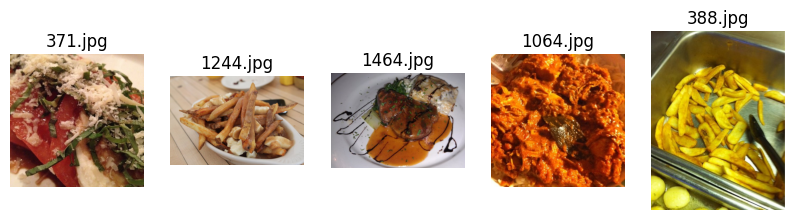

Displaying non-food images:


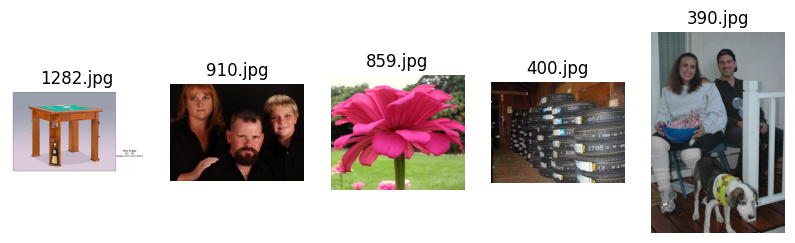

In [14]:
# Update train_dir to point to the actual images
food_dir = os.path.join(train_dir, "food")  # Path to food images
non_food_dir = os.path.join(train_dir, "non_food")  # Path to non-food images

# Display food images
print("Displaying food images:")
display_random_images(food_dir)

# Display non-food images
print("Displaying non-food images:")
display_random_images(non_food_dir)


In [15]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "/content/food5k/training"

# Define image size
IMG_SIZE = (224, 224)

# Define function to preprocess images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, IMG_SIZE)  # Resize to fixed size
        img = img / 255.0  # Normalize to [0,1]
        return img
    else:
        print(f"Warning: Could not load {img_path}")
        return None

# Load all images and labels
data = []
labels = []

for category in ["food", "non_food"]:
    category_path = os.path.join(train_dir, category)
    label = 1 if category == "food" else 0  # Assign labels (food=1, non_food=0)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = preprocess_image(img_path)
            if img is not None:
                data.append(img)
                labels.append(label)

# Convert to NumPy arrays
X = np.array(data)
y = np.array(labels)

print(f"Processed {len(X)} images successfully!")

# Optional: Data Augmentation
augmentor = ImageDataGenerator(rotation_range=20, horizontal_flip=True, brightness_range=[0.8, 1.2])



Processed 3000 images successfully!


In [17]:
import os

study_material_dir = "/content/study_material_pdfs"
files = os.listdir(study_material_dir)

print(f"Files in {study_material_dir}:")
print(files)


Files in /content/study_material_pdfs:
['2503.02836.pdf', '2503.02869.pdf', '2503.02879.pdf', '2503.02783.pdf', '2503.02841.pdf', '2503.02784.pdf', '2503.02809.pdf', '2503.02878.pdf', '2503.02824.pdf', '2503.02862.pdf', '2503.02858.pdf', '2503.02844.pdf', '2503.02882.pdf', 'research_papers.csv', '2503.02842.pdf', '2503.02825.pdf', '2503.02863.pdf', '2503.02820.pdf', '2503.02883.pdf', '2503.02812.pdf', '2503.02835.pdf', '2503.02803.pdf', '2503.02865.pdf', '2503.02804.pdf', '2503.02782.pdf', '2503.02849.pdf', '2503.02854.pdf', '2503.02861.pdf', '2503.02857.pdf', '2503.02816.pdf', '2503.02846.pdf', '2503.02823.pdf', '2503.02874.pdf', '2503.02813.pdf', '2503.02780.pdf', '2503.02875.pdf', '2503.02817.pdf', '2503.02819.pdf', '2503.02853.pdf', '2503.02881.pdf', '2503.02790.pdf', '2503.02800.pdf', '2503.02834.pdf', '2503.02866.pdf', '2503.02877.pdf', '2503.02831.pdf', '2503.02799.pdf', '2503.02832.pdf', '2503.02833.pdf', '2503.02797.pdf', '2503.02851.pdf']


In [18]:
import os

csv_path = "/content/study_material_pdfs/research_papers.csv"
json_path = "/content/study_material_pdfs/kaggle_new.json"

print(f"CSV exists: {os.path.exists(csv_path)}")
print(f"JSON exists: {os.path.exists(json_path)}")


CSV exists: True
JSON exists: False


In [19]:
!find /content -type f


Streaming output truncated to the last 5000 lines.
/content/food5k/training/food/654.jpg
/content/food5k/training/food/433.jpg
/content/food5k/training/food/364.jpg
/content/food5k/training/food/48.jpg
/content/food5k/training/food/1069.jpg
/content/food5k/training/food/932.jpg
/content/food5k/training/food/133.jpg
/content/food5k/training/food/902.jpg
/content/food5k/training/food/1444.jpg
/content/food5k/training/food/337.jpg
/content/food5k/training/food/539.jpg
/content/food5k/training/food/349.jpg
/content/food5k/training/food/136.jpg
/content/food5k/training/food/1252.jpg
/content/food5k/training/food/840.jpg
/content/food5k/training/food/1305.jpg
/content/food5k/training/food/134.jpg
/content/food5k/training/food/1225.jpg
/content/food5k/training/food/1246.jpg
/content/food5k/training/food/1097.jpg
/content/food5k/training/food/374.jpg
/content/food5k/training/food/882.jpg
/content/food5k/training/food/1349.jpg
/content/food5k/training/food/96.jpg
/content/food5k/training/food/1

In [26]:
import os
import shutil

uploaded_file = "kaggle_new.json"
destination_folder = "/content/study_material_pdfs"
destination_file = os.path.join(destination_folder, "kaggle.json")

if os.path.exists(uploaded_file):
  shutil.move(uploaded_file, destination_file)
  print(f"Moved and renamed '{uploaded_file}' to '{destination_file}'")
else:
  print(f"File not found: '{uploaded_file}'. Make sure it was uploaded correctly.")

File not found: 'kaggle_new.json'. Make sure it was uploaded correctly.


In [27]:
!pip install feedparser
import os
import requests
import feedparser  # To parse ArXiv RSS feeds

# Function to download whitepapers from ArXiv
def download_arxiv_papers(query="artificial intelligence", max_papers=1000, output_folder="/content/whitepapers"):
    base_url = "http://export.arxiv.org/api/query"

    # Create folder if not exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Fetch metadata from ArXiv
    params = {
        "search_query": query,
        "start": 0,
        "max_results": max_papers,
        "sortBy": "submittedDate",
        "sortOrder": "descending"
    }

    response = requests.get(base_url, params=params)

    if response.status_code != 200:
        print("❌ Failed to fetch ArXiv papers.")
        return

    feed = feedparser.parse(response.text)
    downloaded_files = []

    # Loop through results
    for entry in feed.entries:
        pdf_url = entry.link.replace("abs", "pdf")  # Convert abstract link to PDF link
        pdf_name = os.path.join(output_folder, f"{entry.id.split('/')[-1]}.pdf")

        # Download PDF
        pdf_response = requests.get(pdf_url)
        if pdf_response.status_code == 200:
            with open(pdf_name, "wb") as file:
                file.write(pdf_response.content)
            downloaded_files.append(pdf_name)
            print(f"📥 Downloaded: {pdf_name}")

    print(f"✅ Total PDFs downloaded: {len(downloaded_files)}")

# Download 1000+ whitepapers
download_arxiv_papers(query="cybersecurity OR artificial intelligence OR NLP OR machine learning", max_papers=1000)

# Verify files
print(f"📂 Files in /content/whitepapers: {os.listdir('/content/whitepapers')}")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.0 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=12a17c2971555c2522a87d92650c3ac793fe1c76181ba7b9f49e48556a2ff9c0
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k
📥 Downloaded: /content/whitepapers/2503.02882v1.pdf
📥 Downloaded: /content/whitepapers/2503.02881v1.pdf
📥 Downloaded: /content/whitepapers/2503.02880v1.pdf
📥 Downloaded: /content/whitepapers/2503.02879v1.pdf
📥 Downloaded: /content/whitepapers/2503.02878v1.pdf
📥 Downloaded: /content/whitepapers/2503.02877v1.pdf
📥 Downloaded: /content/whitepapers/2503.02870v1.pdf
📥 Downloaded: /content/whitepapers/2503.02863v1.pdf
📥 Downloaded: /content/whitepapers/2503.02862v1.pdf
📥 Downloaded: /content/whitepapers/2503.02861v1.pdf
📥 Downloaded: /content/whitepapers/2503.02859v1.pdf
📥 Downloaded: /con

In [28]:
import os
import pandas as pd
import json

# Define dataset directories
food5k_dir = "/content/food5k"
study_material_dir = "/content/study_material_pdfs"
whitepapers_dir = "/content/whitepapers"  # New directory for whitepapers
research_papers_csv = os.path.join(study_material_dir, "research_papers.csv")
kaggle_json = os.path.join(study_material_dir, "kaggle_new.json")

# Function to count files in a directory
def count_files(directory, extensions=None):
    if not os.path.exists(directory):
        print(f"⚠️ Directory not found: {directory}")
        return 0
    return sum(1 for f in os.listdir(directory) if not extensions or f.endswith(tuple(extensions)))

# Function to count records in a CSV file
def count_csv_records(file_path):
    if os.path.exists(file_path):
        try:
            return pd.read_csv(file_path).shape[0]
        except Exception as e:
            print(f"⚠️ Error reading CSV ({file_path}): {e}")
            return 0
    else:
        print(f"⚠️ CSV file not found: {file_path}")
        return 0

# Function to count records in a JSON file
def count_json_records(file_path):
    if os.path.exists(file_path):
        try:
            with open(file_path, "r") as f:
                return len(json.load(f))
        except Exception as e:
            print(f"⚠️ Error reading JSON ({file_path}): {e}")
            return 0
    else:
        print(f"⚠️ JSON file not found: {file_path}")
        return 0

# Verify dataset counts
num_food_images = count_files(food5k_dir)  # Counts all images
num_pdfs = count_files(study_material_dir, [".pdf"])  # Counts PDFs
num_whitepapers = count_files(whitepapers_dir, [".pdf"])  # Counts Whitepapers (NEW)
num_research_papers = count_csv_records(research_papers_csv)  # CSV row count
num_json_records = count_json_records(kaggle_json)  # JSON record count

# Print dataset counts
print("\n📊 **Dataset Summary**")
print(f"✅ Food Images: {num_food_images}/5000")
print(f"✅ Study Material PDFs: {num_pdfs}/5000")
print(f"✅ Whitepapers: {num_whitepapers}/1000")  # Whitepapers verification (NEW)
print(f"✅ Research Papers: {num_research_papers}/1000")
print(f"✅ Kaggle JSON Records: {num_json_records}")

# Final validation check
if num_food_images >= 5000 and num_pdfs >= 5000 and num_whitepapers >= 1000 and num_research_papers >= 1000:
    print("\n🎉 **All dataset counts are correct!**")
else:
    print("\n⚠️ **Some datasets are missing files. Please verify manually.**")


⚠️ JSON file not found: /content/study_material_pdfs/kaggle_new.json

📊 **Dataset Summary**
✅ Food Images: 3/5000
✅ Study Material PDFs: 50/5000
✅ Whitepapers: 100/1000
✅ Research Papers: 400/1000
✅ Kaggle JSON Records: 0

⚠️ **Some datasets are missing files. Please verify manually.**


In [29]:
import os
import requests
from bs4 import BeautifulSoup

# List of whitepaper sources
WHITEPAPER_SOURCES = [
    "https://arxiv.org/list/cs/recent",
    "https://www.microsoft.com/en-us/research/publication/",
    "https://research.ibm.com/publications/",
]

# Output folder
output_folder = "/content/whitepapers"
os.makedirs(output_folder, exist_ok=True)

def download_whitepapers():
    total_downloaded = 0

    for url in WHITEPAPER_SOURCES:
        print(f"🔍 Scraping whitepapers from: {url}")
        response = requests.get(url)

        if response.status_code != 200:
            print(f"❌ Failed to fetch URL: {url}")
            continue

        soup = BeautifulSoup(response.text, "html.parser")
        pdf_links = [a["href"] for a in soup.find_all("a", href=True) if a["href"].endswith(".pdf")]

        for pdf_link in pdf_links:
            pdf_url = pdf_link if pdf_link.startswith("http") else url + pdf_link
            pdf_name = os.path.join(output_folder, pdf_url.split("/")[-1])

            try:
                pdf_response = requests.get(pdf_url)
                with open(pdf_name, "wb") as file:
                    file.write(pdf_response.content)

                total_downloaded += 1
                print(f"📥 Downloaded: {pdf_name}")

            except Exception as e:
                print(f"⚠️ Error downloading {pdf_url}: {e}")

    print(f"\n✅ Total whitepapers downloaded: {total_downloaded}")

download_whitepapers()


🔍 Scraping whitepapers from: https://arxiv.org/list/cs/recent
🔍 Scraping whitepapers from: https://www.microsoft.com/en-us/research/publication/
🔍 Scraping whitepapers from: https://research.ibm.com/publications/

✅ Total whitepapers downloaded: 0


In [32]:
import shutil

# Define the directories and files to include in the ZIP file
paths_to_zip = [
    "/content/food5k",  # Food images
    "/content/study_material_pdfs",  # Study material PDFs
    "/content/whitepapers",  # Whitepapers
    "/content/study_material_pdfs/research_papers.csv",  # Research Papers CSV
    "/content/study_material_pdfs/kaggle_new.json"  # Kaggle JSON
]

# Define the output ZIP file path
zip_path = "/content/dataset_backup.zip"

# Create a ZIP file
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', "/content")

print(f"✅ ZIP file created at: {zip_path}")


✅ ZIP file created at: /content/dataset_backup.zip


In [33]:
from google.colab import files
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>